# Анализ эволюции латинской общественно-политической лексики, выражающей понятие «народ», от античности к Средним векам с помощью эмбеддингов слов

Вариант

In [4]:
import gensim

# Load the two word embedding models
#classical_model = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaLatina.vec.txt', binary=False)
#middle_ages_model = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaMaiora.vec.txt', binary=False)

# Prepare a list of words to analyze
words = ['gens', 'populus', 'natio', 'plebs', 'uulgus']

# Compare the meanings of the words in the two models
for word in words:
    if word in classical_model and word in middle_ages_model:
        similarity = classical_model.similarity(word, middle_ages_model[word])
        print(f'Similarity between {word} in classical and middle ages: {similarity}')
    else:
        print(f'{word} not present in one of the models')
        
# Visualize the results
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# get the word vectors
vectors = []
labels = []
for word in words:
    if word in classical_model and word in middle_ages_model:
        vectors.append(classical_model[word])
        labels.append(word)
        
tsne = TSNE(n_components=2, random_state=0)
vectors_tsne = tsne.fit_transform(vectors)
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for label, x, y in zip(labels, vectors_tsne[:, 0], vectors_tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()


KeyError: ignored

In [ ]:
# Load the two pre-trained word embedding models
from gensim.models import Word2Vec
model1 = Word2Vec.load("classical_era_model.bin")
model2 = Word2Vec.load("medieval_era_model.bin")

# Identify the Latin words for "people" in the two eras
people_words_classical = ["populus", "plebs", "gens"]
people_words_medieval = ["populus", "plebs", "gens", "homines"]

# Extract the word vectors for each word
people_vectors_classical = [model1.wv[word] for word in people_words_classical]
people_vectors_medieval = [model2.wv[word] for word in people_words_medieval]

# Compare the word vectors using cosine similarity
from scipy.spatial.distance import cosine
for i in range(len(people_words_classical)):
    similarity = 1 - cosine(people_vectors_classical[i], people_vectors_medieval[i])
    print(f"Similarity between {people_words_classical[i]} in classical and medieval era: {similarity}")

# Perform PCA on the word vectors
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
people_vectors_classical_pca = pca.fit_transform(people_vectors_classical)
people_vectors_medieval_pca = pca.fit_transform(people_vectors_medieval)

# Plot the PCA results
import matplotlib.pyplot as plt
plt.scatter(people_vectors_classical_pca[:, 0], people_vectors_classical_pca[:, 1], color='r')
plt.scatter(people_vectors_medieval_pca[:, 0], people_vectors_medieval_pca[:, 1], color='b')
plt.legend(['Classical Era', 'Medieval Era'])
plt.show()

# Extract the nearest neighbours of the target words
def nearest_neighbours(model, word, n=10):
    return model.wv.most_similar(word, topn=n)



<ipython-input-15-142507d34574>:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  people_vectors_classical = [model1.wv[word] for word in words]
<ipython-input-15-142507d34574>:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  people_vectors_medieval = [model2.wv[word] for word in words]


Similarity between gens in classical and medieval era: 0.1089944839477539
Similarity between populus in classical and medieval era: -0.14469313621520996
Similarity between natio in classical and medieval era: -0.013743176124989986
Similarity between uulgus in classical and medieval era: 0.018742626532912254
Similarity between genus in classical and medieval era: 0.10008859634399414
Similarity between stirps in classical and medieval era: -0.04545135051012039
Similarity between plebs in classical and medieval era: -0.10358570516109467
Similarity between ciuis in classical and medieval era: -0.03489262983202934
Similarity between ciuitas in classical and medieval era: -0.19689291715621948
Similarity between turba in classical and medieval era: 0.04200400784611702
Similarity between patricius in classical and medieval era: -0.010791834443807602
Similarity between tumultus in classical and medieval era: -0.004233242478221655
Similarity between regnum in classical and medieval era: -0.03433

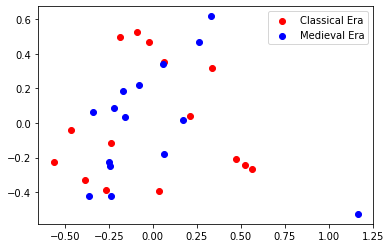

In [15]:
# Load the two pre-trained word embedding models
from gensim.models import Word2Vec

#model1 = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaLatina.vec.txt', binary=False)
#model2 = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaMaiora.vec.txt', binary=False)


# Identify the Latin words for "people" in the two eras

words = ["gens", "populus", "natio", "uulgus", "genus", "stirps",  "plebs", "ciuis", "ciuitas", "turba", "patricius", "tumultus", "regnum", "lingua", "familia"]

# Extract the word vectors for each word
people_vectors_classical = [model1.wv[word] for word in words]
people_vectors_medieval = [model2.wv[word] for word in words]

# Compare the word vectors using cosine similarity
from scipy.spatial.distance import cosine
for i in range(len(words)):
    similarity = 1 - cosine(people_vectors_classical[i], people_vectors_medieval[i])
    print(f"Similarity between {words[i]} in classical and medieval era: {similarity}")

# Perform PCA on the word vectors
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
people_vectors_classical_pca = pca.fit_transform(people_vectors_classical)
people_vectors_medieval_pca = pca.fit_transform(people_vectors_medieval)

# Plot the PCA results
import matplotlib.pyplot as plt
plt.scatter(people_vectors_classical_pca[:, 0], people_vectors_classical_pca[:, 1], color='r')
plt.scatter(people_vectors_medieval_pca[:, 0], people_vectors_medieval_pca[:, 1], color='b')
plt.legend(['Classical Era', 'Medieval Era'])
plt.show()

# Extract the nearest neighbours of the target words
def nearest_neighbours(model, word, n=10):
    return model.wv.most_similar(word, topn=n)

In [13]:
import gensim

# load the two word embedding models
classical_model = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaLatina.vec.txt', binary=False)
medieval_model = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaMaiora.vec.txt', binary=False)

# list of Latin words expressing the concept of "people"
people_words = ["populus", "plebs", "gens", "tribus", "multitudo"]

for word in people_words:
    # check if the word is in both models
    if word in classical_model and word in medieval_model:
        # calculate the cosine similarity between the word vectors
        similarity = classical_model.similarity(word, medieval_model[word])
        print(f"Similarity between '{word}' in classical and medieval models: {similarity}")
    else:
        print(f"'{word}' not found in one or both models")

KeyError: ignored

In [6]:
# Compare the meanings of the words in the two models
for word in words:
    if word in classical_model and word in middle_ages_model:
        similarity = classical_model.similarity(word, middle_ages_model[word])
        print(f'Similarity between {word} in classical and middle ages: {similarity}')
    else:
        print(f'{word} not present in one of the models')

KeyError: ignored

In [9]:
similarity = classical_model.similarity("gens", middle_ages_model["gens"])

KeyError: ignored